# 살펴보기

In [ ]:
import os
data_root = 'data'
mode = 'Train'

mode = 'Train'
print('For Train')
print('\tVideo :', len(os.listdir(os.path.join(data_root,mode,'Video'))))
print('\tAudio :', len(os.listdir(os.path.join(data_root,mode,'Audio'))))
print('\tText  :', len(os.listdir(os.path.join(data_root,mode,'Text'))))

mode = 'Test'
print('For Test')
print('\tVideo :', len(os.listdir(os.path.join(data_root,mode,'Video'))))
print('\tAudio :', len(os.listdir(os.path.join(data_root,mode,'Audio'))))

For Train
	Video : 10000
	Audio : 10000
	Text  : 10000
For Test
	Video : 1000
	Audio : 1000


In [ ]:
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy
!pip install --ignore-installed librosa

def show_dataset(data_root, mode, idx):
  import os
  import librosa
  import mediapy as media
  import IPython.display as ipd

  media.show_video(media.read_video(os.path.join(data_root,mode,'Video',f'{idx+1:0>5}.mp4')))

  x, sr = librosa.load(os.path.join(data_root, mode, 'Audio',f'{idx+1:0>5}.wav'))
  display(ipd.Audio(x, rate=sr))

  if mode.lower() == 'train':
    with open(os.path.join(data_root,mode,'Text',f'{idx+1:0>5}.txt'), 'r') as f:
      print(f.read())

show_dataset('data_folder', 'Train', 0)

     |████████████████████████████████| 203 kB 7.2 MB/s 
     |████████████████████████████████| 38.1 MB 309 kB/s 
     |████████████████████████████████| 323 kB 67.3 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
     |████████████████████████████████| 57 kB 7.4 MB/s 
     |████████████████████████████████| 377 kB 85.7 MB/s 
     |████████████████████████████████| 306 kB 87.1 MB/s 
     |████████████████████████████████| 23.2 MB 1.1 MB/s 
     |████████████████████████████████| 3.3 MB 59.7 MB/s 
     |████████████████████████████████| 15.7 MB 74.2 MB/s 
     |████████████████████████████████| 952 kB 83.5 MB/s 
     |████████████████████████████████| 15.3 MB 65.0 MB/s 
     |████████████████████████████████| 26.3 MB 89.5 MB/s 
     |████████████████████████████████| 97 kB 10.0 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 427 kB 74.3 MB/s 
     |████████████████████████████████| 118 kB 68.4 MB/s 
     |█████████████

나이가 들어서도 친구랑 싸우는 일은 종종 있지


In [ ]:
show_dataset('data_folder','Test',0)

In [ ]:
show_dataset('data_folder','Test',1)

## Video

In [ ]:
import mediapy as media

media.show_video(media.read_video(videos[0]))

In [ ]:
import cv2
def video_info(infilename):
 
    cap = cv2.VideoCapture(infilename)
 
    if not cap.isOpened():
        print("could not open :", infilename)
        exit(0)
 
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
 
    print('length : ', length)
    print('length(sec) : ', length/fps)
    print('width : ', width)
    print('height : ', height)
    print('fps : ', fps)

for i in range(3):
  print(f'{i}th video')
  video_info(os.path.join(data_root, mode, 'Video', videos[i]))
  print('--------------')

0th video
length :  130
length(sec) :  4.333333333333333
width :  224
height :  224
fps :  30.0
--------------
1th video
length :  201
length(sec) :  6.7
width :  224
height :  224
fps :  30.0
--------------
2th video
length :  206
length(sec) :  6.866666666666666
width :  224
height :  224
fps :  30.0
--------------


## Audio

In [ ]:
#!pip install --ignore-installed librosa
import librosa
import IPython.display as ipd

x, sr = librosa.load(os.path.join(data_root, mode, 'Audio', audios[0]))
ipd.Audio(x, rate=sr)

In [ ]:
from scipy.io import wavfile

fs, wav = wavfile.read(os.path.join(data_root, mode, 'Audio', audios[0]))

print(f'frame for second : {fs}')
print(f'shape :', wav.shape)
print(f'length of wav    : {wav.shape[0]/fs}')
print(wav)

frame for second : 48000
shape : (206914, 2)
length of wav    : 4.310708333333333
[[ 232  226]
 [ 224  222]
 [ 228  220]
 ...
 [-422 -424]
 [-437 -436]
 [-442 -441]]


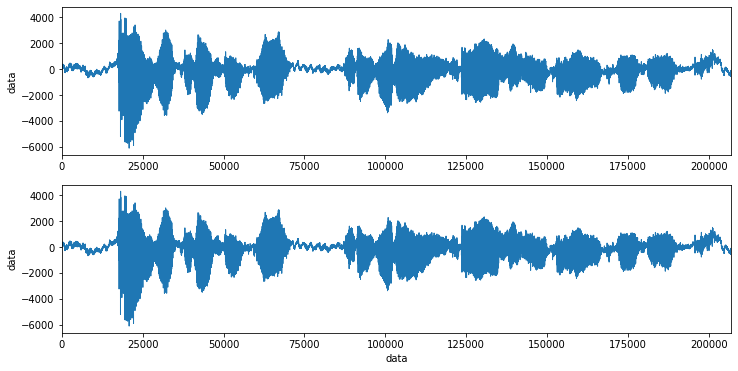

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,1, figsize=(12,6))

ax[0].plot(wav[:,0], lw = 1)
ax[0].set_ylabel("data")
ax[0].set_xlim(0, len(wav))

ax[1].plot(wav[:,0], lw = 1)
ax[1].set_ylabel("data")
ax[1].set_xlim(0, len(wav))

plt.xlabel("data")
plt.show()

## Text

In [ ]:
with open(os.path.join(data_root,mode,'Text',labels[0]), 'r') as f:
  text = f.read()
text

'나이가 들어서도 친구랑 싸우는 일은 종종 있지'

# 전처리

https://stackoverflow.com/questions/54238670/what-is-the-advantage-of-saving-npz-files-instead-of-npy-in-python-regard

In [ ]:
!python vid2npy.py --data_folder data_folder/Train/Video

100% 10000/10000 [1:43:16<00:00,  1.61it/s]


In [ ]:
!python preprocessing.py --data_folder data_folder/Train --mode Train

preprocess started..
create_script started..


In [ ]:
import numpy as np

val_rate = 0.2

with open('./dataset/Train.txt','r') as f:
  dataset = f.readlines()
np.random.shuffle(dataset)

val_len = round(len(dataset)*val_rate)
with open('./dataset/Train.txt','w') as f:
  for line in dataset[-val_len:]:
    f.write(line)
with open('./dataset/Valid.txt','w') as f:
  for line in dataset[:-val_len]:
    f.write(line)